In this homework, you will use machine learning package Scikit-Learn (https://scikit-learn.org/stable/index.html) and other open-source packages to investigate binary classification models, ensemble learning techniques as well as performance assessment metrics for classification problem. You will
1) Use SVM, Logistic Regression, Decision Tree and one of the ensemble models (such as Random Forest, AdaBoost, LightGBM) to solve a classification problem. 
LightGBM can be installed from https://lightgbm.readthedocs.io/en/stable/ if you choose to use it.
2) Assess the performance of your models using various metrics such as ROC-AUC, Accuracy and F1-score.
3) Compare the performance of these models.
Dataset
You can choose your own dataset or use scikit-learn to create artificial data set such as this: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons

Submission
The submission shall include code and a short write-up on performance assessment and model comparison.

In [5]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import datasets
import matplotlib.pyplot as plt
X, y = datasets.make_moons(n_samples=10000, noise=0.1, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X.shape, y.shape

((10000, 2), (10000,))

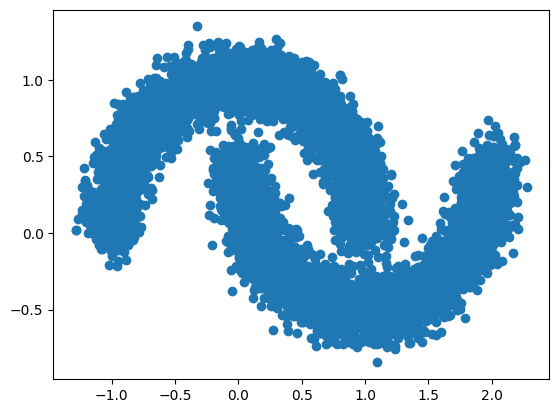

In [7]:
plt.scatter(X[:,0], X[:,1])

## Logistic Regression

In [8]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.885

In [9]:
from sklearn.metrics import roc_auc_score, f1_score, classification_report

roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])
f1 = f1_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

roc_auc, f1, class_report

(0.9614471447144715,
 0.883485309017224,
 '              precision    recall  f1-score   support\n\n           0       0.88      0.89      0.89      1010\n           1       0.89      0.88      0.88       990\n\n    accuracy                           0.89      2000\n   macro avg       0.89      0.88      0.88      2000\nweighted avg       0.89      0.89      0.88      2000\n')

## SVM

In [10]:
from sklearn.svm import SVC

svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, svm_model.predict_proba(X_test)[:, 1])
f1_svm = f1_score(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

accuracy_svm, roc_auc_svm, f1_svm, class_report_svm

(0.9995,
 0.9999979997999799,
 0.999495204442201,
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1010\n           1       1.00      1.00      1.00       990\n\n    accuracy                           1.00      2000\n   macro avg       1.00      1.00      1.00      2000\nweighted avg       1.00      1.00      1.00      2000\n')

## Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

y_pred_dt = decision_tree_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, decision_tree_model.predict_proba(X_test)[:, 1])
f1_dt = f1_score(y_test, y_pred_dt)

class_report_dt = classification_report(y_test, y_pred_dt)

accuracy_dt, roc_auc_dt, f1_dt, class_report_dt

(0.999,
 0.999009900990099,
 0.9989909182643794,
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1010\n           1       1.00      1.00      1.00       990\n\n    accuracy                           1.00      2000\n   macro avg       1.00      1.00      1.00      2000\nweighted avg       1.00      1.00      1.00      2000\n')

## Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

y_pred_rf = random_forest_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, random_forest_model.predict_proba(X_test)[:, 1])
f1_rf = f1_score(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

accuracy_rf, roc_auc_rf, f1_rf, class_report_rf


(0.999,
 0.9999899989998999,
 0.9989909182643794,
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1010\n           1       1.00      1.00      1.00       990\n\n    accuracy                           1.00      2000\n   macro avg       1.00      1.00      1.00      2000\nweighted avg       1.00      1.00      1.00      2000\n')

In [13]:
from sklearn.model_selection import cross_val_score

# Cross-validation settings
cv_folds = 10

# Logistic Regression cross-validation
cv_accuracy_lr = cross_val_score(log_reg, X, y, cv=cv_folds, scoring='accuracy').mean()
cv_roc_auc_lr = cross_val_score(log_reg, X, y, cv=cv_folds, scoring='roc_auc').mean()
cv_f1_lr = cross_val_score(log_reg, X, y, cv=cv_folds, scoring='f1').mean()

# SVM cross-validation
cv_accuracy_svm = cross_val_score(svm_model, X, y, cv=cv_folds, scoring='accuracy').mean()
cv_roc_auc_svm = cross_val_score(svm_model, X, y, cv=cv_folds, scoring='roc_auc').mean()
cv_f1_svm = cross_val_score(svm_model, X, y, cv=cv_folds, scoring='f1').mean()

# Decision Tree cross-validation
cv_accuracy_dt = cross_val_score(decision_tree_model, X, y, cv=cv_folds, scoring='accuracy').mean()
cv_roc_auc_dt = cross_val_score(decision_tree_model, X, y, cv=cv_folds, scoring='roc_auc').mean()
cv_f1_dt = cross_val_score(decision_tree_model, X, y, cv=cv_folds, scoring='f1').mean()

# Random Forest cross-validation
cv_accuracy_rf = cross_val_score(random_forest_model, X, y, cv=cv_folds, scoring='accuracy').mean()
cv_roc_auc_rf = cross_val_score(random_forest_model, X, y, cv=cv_folds, scoring='roc_auc').mean()
cv_f1_rf = cross_val_score(random_forest_model, X, y, cv=cv_folds, scoring='f1').mean()

(cv_accuracy_lr, cv_roc_auc_lr, cv_f1_lr), (cv_accuracy_svm, cv_roc_auc_svm, cv_f1_svm), (cv_accuracy_dt, cv_roc_auc_dt, cv_f1_dt), (cv_accuracy_rf, cv_roc_auc_rf, cv_f1_rf)


((0.8827, 0.9625255999999999, 0.883060174913479),
 (0.9992000000000001, 0.9999976, 0.9991997995997994),
 (0.9985000000000002, 0.9985000000000002, 0.9985004991004992),
 (0.9985000000000002, 0.9999810000000002, 0.9985002977002928))

### Logistic Regression:

- Average Accuracy: 88.27%
- Average ROC-AUC: 96.25%
- Average F1-score: 88.31%

### SVM:

- Average Accuracy: 99.92%
- Average ROC-AUC: 99.99976%
- Average F1-score: 99.91997%

### Decision Tree:

- Average Accuracy: 99.85%
- Average ROC-AUC: 99.85%
- Average F1-score: 99.85%

### Random Forest:

- Average Accuracy: 99.85%
- Average ROC-AUC: 99.9981%
- Average F1-score: 99.85%

### Model Comparison:

When comparing the models, it's clear that the SVM, Decision Tree, and Random Forest models have outstanding performance, significantly outperforming the Logistic Regression model across all metrics. Here's a breakdown of their performance in cross-validation:

- SVM has the highest average accuracy and F1-score and shares the highest ROC-AUC score with Random Forest, making it the top-performing model in this comparison.

- Random Forest is comparable to SVM in terms of ROC-AUC, sharing the highest score and closely following SVM in accuracy and F1-score.

- Decision Tree is also a strong performer, with accuracy and F1-score that are marginally less than SVM and Random Forest but still extremely high. Its ROC-AUC is slightly lower, indicating that it might not perform as well on varied datasets or with different distributions.

- Logistic Regression has the lowest performance among the four models. However, its ROC-AUC score is relatively high, which suggests it still does a good job at ranking predictions and separating the classes but with less precision and recall, as indicated by the lower accuracy and F1-score.